# Digits Recognition using Naive Bayes
## Read data

In [1]:
# Install any python packages that you're missing (numpy, pandas, matplotlib, sklearn etc)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Read training images
# Around 42000 images
train = pd.read_csv('train.csv')
print('shape', train.shape)

# Read test images
# Around 28000 images
test = pd.read_csv('test.csv' )

# Check how these csv files look like. 
# Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
# Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, 
# with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.'
# The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit '
# that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.'


shape (42000, 785)


In [2]:
# If you want to see how the data read looks like, uncomment any one of the two lines
train.head()
#test.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Prepare data for training

In [7]:
'We now prepare the data for traning of the Naive Bayes model'
'First 10k images are used for training; next 2k images for testing'

# Todo: Check indexing in pandas at https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

# Select the first 10k rows and 784 columns
features_train = train.iloc[0:10000,1:785].as_matrix(columns=None) #inget as_matrix på lektion. han körde .values istället.
labels_train = train.iloc[0:10000,0:1].as_matrix(columns=None)
print('Training data shape', features_train.shape, 'Label data shape', labels_train.shape)

# Clip all values to be between 0 and 1
features_train = np.clip(features_train, 0, 1)

# Get test data, next 2K images
features_test = train.iloc[10000:12000,1:785].as_matrix(columns=None)
labels_test = train.iloc[10000:12000,0:1].as_matrix(columns=None)

# Clip all values to be between 0 and 1
features_test = np.clip(features_test, 0, 1)
print(features_test[1])



Training data shape (10000, 784) Label data shape (10000, 1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 

C:\Users\jonnn\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\jonnn\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\jonnn\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\jonnn\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


## Train the Naive Bayes (NB) model

In [8]:
# sklearn or scikit-learn is the python's ML learning library http://scikit-learn.org/stable/index.html
# There are different kind of NB models such as Multinomial, Gaussian, Bernaulli
# We will use Bernaulli. You can test other types also and see which one is best
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# clf = MultinomialNB()
# clf = GaussianNB()
clf = BernoulliNB()
clf.fit(features_train, labels_train.ravel()) 
'Thats it! model is trained with just one line!'

'Thats it! model is trained with just one line!'

## Make predictions, test accuracy

In [9]:
# Get predictions for test set
y_pred = clf.predict(features_test)

# get true labels from test set
y_true = labels_test.ravel()

# Print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of NB is', accuracy_score(y_true, y_pred)*100,'%')


Accuracy of NB is 82.35 %


## Visualize output

True label: 3 predicted: 9


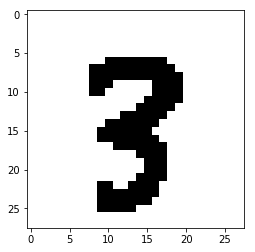

In [23]:
#28 pixels in height and 28 

# Input the id of the test image
id = 909

B = np.reshape(features_test[id], (28, 28)) 

# Standard pyplot command to display image
plt.imshow(B,cmap=plt.cm.gray_r,interpolation='nearest')
print('True label:',y_true[id], 'predicted:', y_pred[id])